# Урок 1, Pandas

In [ ]:
#Итог урока
#Кортеж - ы = (1,2,3,4,5)
#Серия - лейбл и его индексы
#Коллекция - содержит значения словаря и дает на выходе данные в виде []
#Словарь - ключ- значение. на выходе подается через {}

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
students_perfomance = pd.read_csv('C:/Users/Melihov_OO/Downloads/StudentsPerformance.csv')

In [ ]:
students_perfomance

In [ ]:
students_perfomance.describe()

In [ ]:
students_perfomance.dtypes
#Атрибут (необходимо смотреть курс по базе программирования питон). Тк это атрибут, то скобки не вызываются
# Types позволяет посмотреть типы данных, хранящихся в датафрейме

In [ ]:
students_perfomance.groupby('gender').aggregate({'writing score' : 'mean'})
# goupby позволяет сгруппировать данные, а aggregate провести вычислительные действия над числовыми данными, 
# подверженными группировке, в данном случае mean - средняя

In [ ]:
students_perfomance.iloc[0:5, 0:3]
# ILOC - INTEGER LOCATION \\ Мы обратились сначала к строкам (0 - 5), а потом к столбцам (0 - 3)

In [ ]:
students_perfomance_small = students_perfomance.iloc[[0, 3, 4, 7, 8]]
students_perfomance_small

In [ ]:
students_perfomance_small.index = ["Cersei", "Tywin", "Gregor", "Joffrey", "Ilyn Payne"]
students_perfomance_small
# INDEX // Присваивает в качестве аргумента то, что мы захотим, в данном случае имена

In [ ]:
students_perfomance_small.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']]
# LOC // обращается к лэйблам - названиям столбцов или индексов (добавили ранее)


In [ ]:
students_perfomance_small.iloc[:,1]
#Вызывается "серия", то есть лейбл и его индексы
#Соответственно "Датафрейм" это набор серий

In [ ]:
my_series_1 = pd.Series([1, 2, 3], index = ["Cersei","Tywin", "Gregor"])
my_series_2 = pd.Series([4, 5, 6], index = ["Cersei","Tywin", "Gregor"])
#создаем "СЕРИИ"

In [ ]:
pd.DataFrame({'Col_name_1': my_series_1, 'Col_name_2' : my_series_2})
#Создаем "Датафрейм"

In [ ]:
students_perfomance_small[['gender']]
# Одна квадратная скобка - серия, а две  - датафрейм


In [ ]:
students_perfomance_small.shape

# Задача 1

In [ ]:
titanic = pd.read_csv('C:/Users/Melihov_OO/Downloads/titanic.csv')
titanic

In [ ]:
titanic.info

# Урок 2 Фильтрация

In [ ]:
students_perfomance.loc[students_perfomance['writing score'] > mean_writing_score]
# Фильтрация в Pandas

In [ ]:
mean_writing_score = students_perfomance['writing score'].mean()
# Нашли среднюю

In [ ]:
students_perfomance['writing score'].mean()

In [ ]:
querry = students_perfomance.loc[(students_perfomance['writing score'] > mean_writing_score) & (students_perfomance.gender == 'female')]
# Фильтр комбинированный с И(&)

In [ ]:
querry.head()

Задача 1


In [ ]:
count_lunch = students_perfomance['lunch'].count()

In [ ]:
print(students_perfomance.lunch[students_perfomance.lunch == 'free/reduced'].count()/students_perfomance['lunch'].count())
#необходимо было найти значение по фильтру и поделить на общее количество
#В левой части отфильтровал данные по признаку фри/редьюс и поделил на количество значений столбца

In [ ]:
students_perfomance.groupby('lunch').aggregate({'math score':['count', 'mean', 'std'], 'reading score':['count', 'mean', 'std'], 'writing score' :['count', 'mean', 'std']})
#Необходимо было найти 3 расчетных значения для всех типов ланча у студентов
# Для начала группировка, потом аггрегация и внутри ее создаем словарь из расчетных показателей и расчитываемых величин

In [ ]:
# = students_perfomance \
    .rename(columns =  
           {'parental level of education': 'parental_level_of_education',
           'test preparation course': 'test_preparation_course',
           'math score': 'math_score',
           'reading score': 'reading_score',
           'writing score': 'writing_score'})
students_perfomance
# RENAME // Переименовали столбы для более удобного обращения к ним 

In [ ]:
students_perfomance.query('gender == "female" & writing_score > 78')
# Метод фильтрации через QUERY

In [ ]:
students_perfomance[students_perfomance['parental_level_of_education'].isin(["bachelor's degree", "master's degree"])]

In [ ]:
score_columns = [i for i in list(students_perfomance) if 'score' in i ] 
#Отбор столбцов в таблице по слову SCORE с помощью цикла

In [ ]:
students_perfomance_small.filter(like = 'e', axis = 0)
#Фильтрация с помощью FILTER, где можно указать регулярку через LIKE и условием строки/столбика - AXIS (1 - столбец, 0 - строка)


# Урок 3 - агрегация 

In [ ]:
students_perfomance.groupby('gender', as_index = False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score'})
#Пример агрегации для альтернативного представления после групбай нужно поставить as_index = False

In [ ]:
mean_score = students_perfomance.groupby(['gender','race/ethnicity'], as_index = False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns = {'math_score': 'mean_math_score','reading_score': 'mean_reading_score'})
    
#Пример агрегации с двумя переменными
mean_score

In [ ]:
mean_score.index


In [ ]:
students_perfomance.sort_values(['gender','math_score'], ascending=False) \
    .groupby('gender').head(5)
# отсортировали по полу и оценкам, сгруппировали по полу и выдали 5 записей от каждой группы

In [ ]:
students_perfomance['total_score'] = students_perfomance.reading_score + students_perfomance.writing_score + students_perfomance.math_score
students_perfomance
#Метод добавления нового столбца и заполнения его данными в лоб

In [ ]:
students_perfomance = students_perfomance.assign(total_score_log = np.log(students_perfomance.total_score))
students_perfomance
#Добавили столбец, который берет логарифм от тотал скор

In [ ]:
students_perfomance.drop(['total_score_log'], axis = 1)

# Задача 2 

In [ ]:
dota_hero_stats = pd.read_csv('C:/Users/Melihov_OO/Downloads/dota_hero_stats.csv')
dota_hero_stats

In [ ]:
dota_hero_stats.groupby('legs').aggregate({'legs': 'count'}) \
    .rename(columns = {'legs': 'count_legs'})

In [ ]:
dota_attr = dota_hero_stats.groupby(['attack_type', 'primary_attr'])\
    .aggregate({'primary_attr': 'count', 'attack_type': 'count'})
dota_attr


# Задача 3

In [ ]:
accountancy = pd.read_csv('C:/Users/Melihov_OO/Downloads/accountancy.csv')
accountancy.head()

In [ ]:
accountancy.groupby(['Type', 'Executor'], as_index = False).aggregate({'Salary': 'mean'}) \
    .rename(columns = {'Salary': 'mean_salary_of_group'})

In [ ]:
file = 'http://stepik.org/media/attachments/course/4852/algae.csv'


df =pd.read_csv(file)

mean_concentrations =df.groupby(['genus'], as_index = False)\
    .aggregate(
    mean_suc = ('sucrose', 'mean'),
    mean_alanin = ('alanin', 'mean'),
    mean_citrate = ('citrate', 'mean'),
    mean_glucose = ('glucose', 'mean'),
    mean_oleic_acid = ('oleic_acid', 'mean')
)

# Урок 4. Визуализации

In [ ]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

In [ ]:
students_perfomance.math_score.hist()
#Гистограмма

In [ ]:
students_perfomance.plot.scatter(x= 'math_score', y= 'reading_score')

In [ ]:
ax = sns.lmplot(x= 'math_score', y= 'reading_score',hue = 'gender', data = students_perfomance, fit_reg = False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [ ]:
inc = pd.read_csv('C:/Users/Melihov_OO/Downloads/income.csv')

In [ ]:
sns.lineplot(data = inc)

In [ ]:
df = pd.read_csv('C:/Users/Melihov_OO/Downloads/dataset_209770_6.txt', sep = ' ')
df.head()

In [ ]:
df.plot.scatter(x= 'x', y= 'y')

In [ ]:
genome_matrix = pd.read_csv('C:/Users/Melihov_OO/Downloads/genome_matrix.csv', index_col=0)
genome_matrix


In [ ]:

ax = sns.heatmap(data=genome_matrix, annot=True, cmap="viridis", linewidths=.5);

ax.xaxis.set_ticks_position('top')

ax.xaxis.set_tick_params(rotation=90)

In [ ]:
dota_hero_stats = pd.read_csv('C:/Users/Melihov_OO/Downloads/dota_hero_stats.csv')
dota_hero_stats

In [ ]:
dota_hero_stats.mode()

In [ ]:
dota_hero_stats['cnt'] = dota_hero_stats.roles.str.count(',')+1

dota_hero_stats

In [ ]:
count_d = dota_hero_stats.groupby(['cnt', 'primary_attr'], as_index = False).aggregate({'cnt': 'count'})\
    .rename(columns = {'cnt': 'COUNT'})
count_d.groupby('primary_attr', as_index = False).aggregate({'COUNT': 'sum'})
count_d.COUNT.hist()
#sns.histplot(data=count_d, y="cnt")

In [ ]:
dota_hero_stats['roles']

In [ ]:
iris = pd.read_csv('C:/Users/Melihov_OO/Downloads/iris.csv')
iris.head()

In [ ]:
iris = sns.load_dataset("iris")
sns.kdeplot(data=iris)

In [ ]:
iris_violin_plot['','']

In [ ]:
sns.violinplot(y = iris["petal_length"], orient = 'v')

In [ ]:
sns.pairplot(iris, hue="species", diag_kind="hist")

In [ ]:
#создаем "СЕРИИ"

my_data_2 = pd.Series(['A', 'A', 'B', 'B'], index = ["1", "2", "3", "4"])
my_data_1 = pd.Series([10, 14, 12, 23], index = ["A", "A", "B", "B"])
# Создаем датафрейм
pd.DataFrame({'type': my_data_1, 'value': my_data_2})

# Задача 2

In [109]:

my_stat = pd.read_csv('C:/Users/Melihov_OO/Downloads/my_stat.csv')
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [110]:
subset_1 = my_stat[['V1','V3']].iloc[0:11]
subset_1
subset_2 = my_stat[['V2','V4']].drop([1, 5], axis=0)
subset_2


,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0
...,...,...
495,8.0,-1.0
496,8.0,1.0
497,11.0,2.0
498,11.0,2.0


In [ ]:
s_1 = my_stat.loc[(my_stat['V1'] > 0) & (my_stat.V3 == 'A')]
s_1
s_2 = my_stat.loc[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
s_2

In [ ]:
#Теперь давайте преобразуем наши данные. 
#В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. 
#В этих данных (my_stat) создайте две новые переменных: V5 = V1 + V4
#V6 = натуральный логарифм переменной V2

my_stat['V5'] = my_stat.V1 + my_stat.V4
my_stat = my_stat.assign(V6 = np.log(my_stat.V2))
my_stat

In [ ]:
my_stat.rename(columns = {'V1': 'session_value', 'V2':'group','V3':'time','V4':'n_users'})

In [ ]:
my_stat = pd.read_csv('C:/Users/Melihov_OO/Downloads/my_stat_1.csv')
my_stat_1 = my_stat.fillna(0)
my_stat_1

In [ ]:
my_stat_2 = my_stat_1.loc[(my_stat_1['n_users'] > 0)]
med = my_stat_2['n_users'].median()
my_stat_1['n_users'] = np.where(my_stat_1.n_users < 0, med, my_stat_1.n_users)
my_stat_1

In [ ]:
mean_session_value_data = my_stat.groupby('group', as_index = False).agg({'session_value': 'mean'})
mean_session_value_data.rename(columns = {'session_value': 'mean_session_value'})

In [ ]:
my_stat['session_value'] = my_stat['session_value'].fillna(0)
my_stat.loc[my_stat["n_users"] < 0, "n_users"] = \
    my_stat.loc[my_stat["n_users"] >= 0, "n_users"].median()

#  Stepik ML contest Блок 2 // Дата препроцессинг


In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Настройка для размера графика
sns.set(rc = {'figure.figsize': (9,6)})

In [5]:
#Читаем файл
events_data = pd.read_csv('C:/Users/Melihov_OO/Downloads/event_data_train.csv')
submissions_data = pd.read_csv('C:/Users/Melihov_OO/Downloads/submissions_data_train.csv')

In [6]:
#Первый взгляд
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [7]:
#Создаем дату из таймстампа
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [6]:
#Посмотреть мин макс для данных
events_data.date.max()
events_data.date.min()


Timestamp('2015-06-15 04:00:48')

In [8]:
#Добавили день
events_data['day'] = events_data.date.dt.date

<AxesSubplot:xlabel='day'>

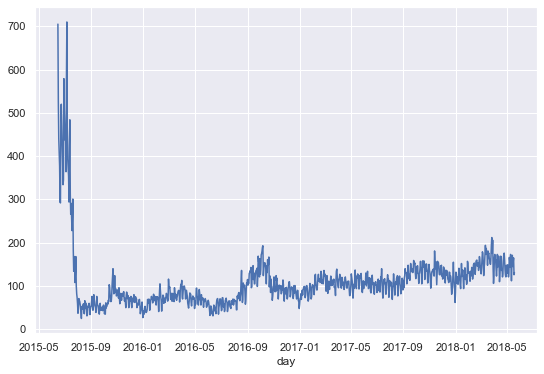

In [9]:
#График для проверкиб осознания данных
events_data.groupby('day') \
    .user_id.nunique().plot()

<AxesSubplot:>

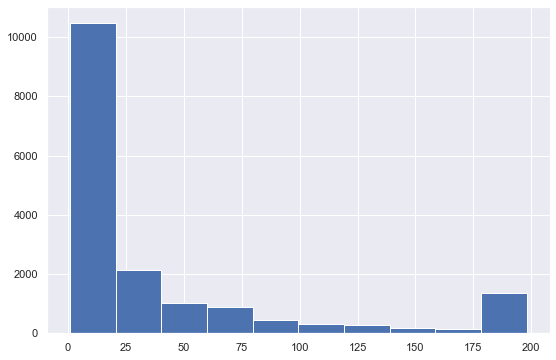

In [10]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_steps'}).passed_steps.hist()

In [11]:
user_events_data = events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                       fill_value = 0).reset_index()
user_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<AxesSubplot:>

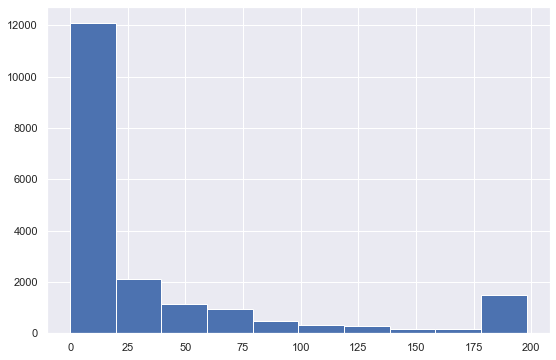

In [13]:
events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                       fill_value = 0).reset_index().discovered.hist()

In [14]:
submissions_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date

In [12]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 04:00:48,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 04:00:48,2015-06-15
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
3,31972,1478852164,correct,15853,2015-06-15 04:01:35,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2015-07-11 13:40:14,2015-07-11
509100,120745,1503059927,correct,13177,2015-07-11 13:40:14,2015-07-11
509101,120745,1506348153,wrong,15253,2015-07-11 13:40:19,2015-07-11
509102,120745,1523035316,wrong,1424,2015-07-11 13:40:19,2015-07-11


In [15]:
user_scores = submissions_data.pivot_table(index = 'user_id', 
                                            columns = 'submission_status', 
                                            values = 'step_id', 
                                            aggfunc = 'count', 
                       fill_value = 0).reset_index()


In [16]:
gap_data = events_data[['user_id','day', 'timestamp']].drop_duplicates(subset = ['user_id','day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [17]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [18]:
gap_data = gap_data / (24 * 60 * 60)


In [19]:
gap_data[gap_data < 200].head()

0    56.060208
1    79.852419
2     2.112083
3     1.084606
4    32.047106
dtype: float64

In [20]:
gap_data.quantile(0.90)

18.325995370370403

In [19]:
30* 24 * 60* 60

2592000

In [21]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [22]:
users_data = events_data.groupby('user_id', as_index = False) \
    .agg({'timestamp': 'max'}).rename(columns = {'timestamp': 'last_timestamp'})

In [23]:
now = 1526772811
drop_out_treshhold = 2592000

In [24]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshhold


In [25]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [26]:
users_data = users_data.merge(user_scores,on = 'user_id', how = 'outer')

In [27]:
users_data = users_data.fillna(0)

In [28]:
users_data = users_data.merge(user_events_data, on = 'user_id', how = 'outer')




In [29]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [30]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [31]:
users_data = users_data.merge(users_days, on = 'user_id', how = 'outer')

In [32]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [33]:
users_data['passed_course'] = users_data.passed > 170

In [34]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [53]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


# ML Data contest 2\\ Обучение модели

In [35]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


<AxesSubplot:>

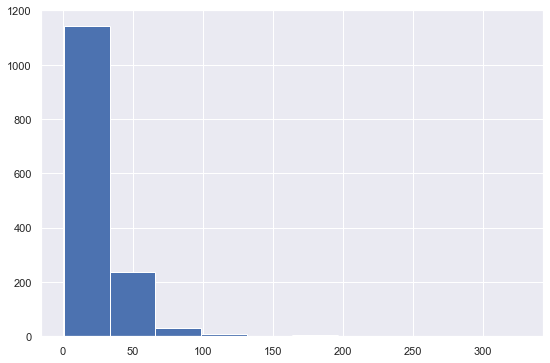

In [36]:
users_data[users_data.passed_course].day.hist()

In [41]:
user_min_time = events_data.groupby('user_id', as_index = False)\
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis = 1)

In [42]:
users_data = users_data.merge(user_min_time, how = 'outer')

In [44]:
events_data_train = pd.DataFrame()

In [50]:
    # Способ топорный и долгий.
    # Цикл 
for user_id in users_data.user_id:
    # отобрать пользователей c минимальным временем
    min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
    # Создаем переменную с порогом времени
    time_treshhold = min_user_time + 3 * 60 * 60
    # фильтруем
    user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_treshhold)]
    
    # Наращиваем таблицу
    events_data_train = events_data_train.append(user_events_data)
    

In [ ]:
 # Православный метод
events_data_train = event_data[]

In [52]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)


In [55]:
learning_time_treshhold = min_user_time + 3 * 24 * 60 * 60
learning_time_treshhold

1521234963

In [57]:
user_learning_time_treshhold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_treshhold).map(str)

In [59]:
user_min_time['user_learning_time_treshhold'] = user_learning_time_treshhold

In [65]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_treshhold']], how = 'outer')
events_data

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_treshhold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_2955575811
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_2955575811
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_2955575811
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_2955575811
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_2955575811
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_3047997627
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,943_1526762783,943_3047997627
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_3048007713
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750,5198_3048007713


In [81]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_treshhold]

# минизадачка по поиску самого сложного задания

In [114]:
test = submissions_data.loc[submissions_data['submission_status']== 'wrong'] 


,step_id,timestamp,submission_status,user_id,date,day
2,31972,1478852149,wrong,15853,2015-06-15 04:00:48,2015-06-15
4,31976,1434348123,wrong,15853,2015-06-15 04:01:35,2015-06-15
15,32031,1434363465,wrong,15853,2015-06-15 04:03:36,2015-06-15
33,32795,1434520465,wrong,15853,2015-06-15 04:09:45,2015-06-15
38,32812,1434346160,wrong,15853,2015-06-15 04:18:51,2015-06-15
...,...,...,...,...,...,...
509096,120745,1500154509,wrong,3310,2015-07-11 13:39:55,2015-07-11
509099,120745,1501946959,wrong,2615,2015-07-11 13:40:14,2015-07-11
509101,120745,1506348153,wrong,15253,2015-07-11 13:40:19,2015-07-11
509102,120745,1523035316,wrong,1424,2015-07-11 13:40:19,2015-07-11


In [125]:
test.groupby(['step_id'], as_index = False).agg({'timestamp': 'max', 'user_id': 'count'}) \
.rename({'user_id': 'amount_of_users'}, axis  = 1) \
.sort_values(['amount_of_users', 'timestamp'],ascending=False)

,step_id,timestamp,amount_of_users
4,31978,1526764091,16084
11,32031,1526754111,13373
19,32202,1526763443,13002
44,33481,1526728707,10300
12,32075,1526755321,10003
...,...,...,...
45,33482,1526709910,707
59,33681,1526760993,703
36,33362,1526700038,673
16,32175,1526760147,342


In [108]:
submissions_data.groupby(['user_id'], as_index = False).agg({'timestamp': 'max'})

,user_id,timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601
...,...,...
9935,26787,1469015051
9936,26790,1451722691
9937,26794,1511374868
9938,26797,1508425828


In [106]:
test['submission_status'].loc[test['submission_status'] == 'wrong']

2     wrong
4     wrong
15    wrong
33    wrong
38    wrong
41    wrong
42    wrong
43    wrong
45    wrong
50    wrong
51    wrong
52    wrong
54    wrong
64    wrong
65    wrong
68    wrong
69    wrong
91    wrong
98    wrong
Name: submission_status, dtype: object

# Поиск создателя курса

In [ ]:
events_data['month'] = events_data['date'].dt.to_period("M")
events_data.info()

In [ ]:
events_data

In [ ]:
events_data['action'].unique()

In [ ]:
test_1 = events_data.loc[(events_data['month'] >= '2017-12') & (events_data['month'] <= '2018-06')\
                         & (events_data['action'] == 'viewed')]
test_1

In [ ]:
test_2 = test_1.groupby(['user_id', 'month'], as_index = False).aggregate({'action': 'count'})\
    .rename(columns = {'action': 'count_action'}).sort_values(['count_action','month'], ascending=False)
test_2

In [ ]:
test_3 = test_2.groupby(['user_id'], as_index = False).agg({'month': 'count', 'count_action': 'sum'})\
    .sort_values([ 'month'], ascending= False)
test_3

In [ ]:
test_3.loc[test_3['month'] == 6]

In [ ]:
my_stat['session_value'] = my_stat['session_value'].fillna(0)
my_stat.loc[my_stat["n_users"] < 0, "n_users"] = \
    my_stat.loc[my_stat["n_users"] >= 0, "n_users"].median()